Atividade 01 - Fabricia

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela:{}".format(df.shape))

df.head()

Número de linhas e colunas da tabela:(16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [5]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


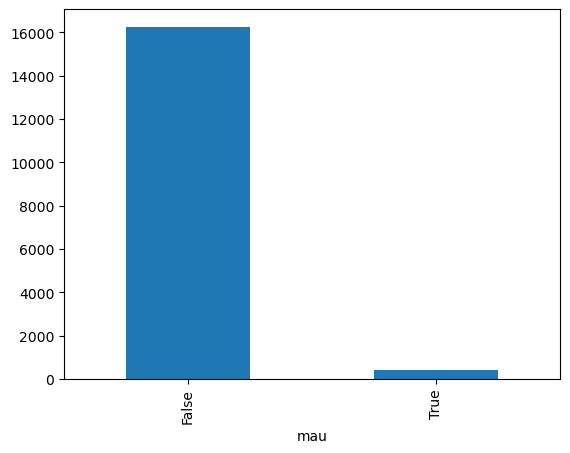

In [6]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

Tarefa 01 - gráfico de barras
Com base no código da célula anterior, construa um gráfico de barras para pelo menos duas outras variáveis. Dica: Não tente usar as variáveis tempo_emprego e idade pois o gráfico de barras dessa forma como construímos não é adequado para elas.

Vamos verificar como estão distribuidos os níveis de formação.

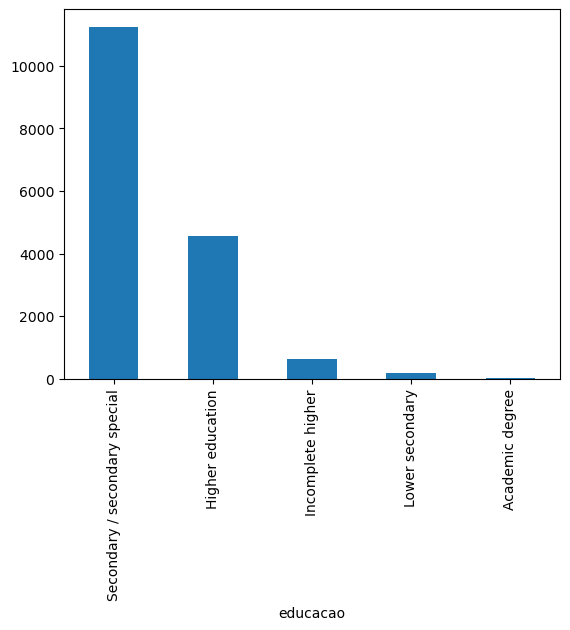

In [9]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

Vamos verificar a variável estado civil

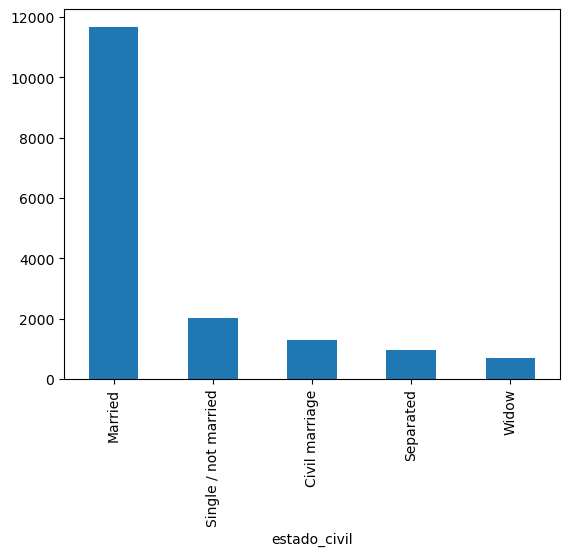

In [11]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

Tarefa 02 - Histograma 
Com base no código da célula anterior, construa o histograma da variavel dade.

<Figure size 640x480 with 0 Axes>

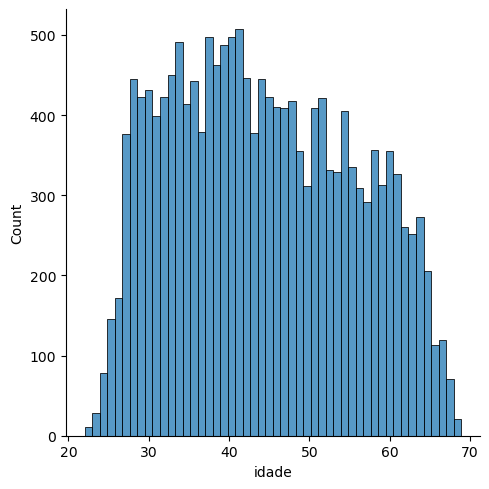

In [13]:
plt.clf()  
var = "idade"  
sns.displot(df, x=var, bins=50)
plt.show()


Tarefa 03 - Bivariada 
Com base no código da célula anterior, construa uma análise bivariada para a variável tempo_emprego. Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito.

C:\Users\fabri\AppData\Local\Temp\ipykernel_14972\723214930.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)  # Agrupa os dados com base nos intervalos de tempo de emprego


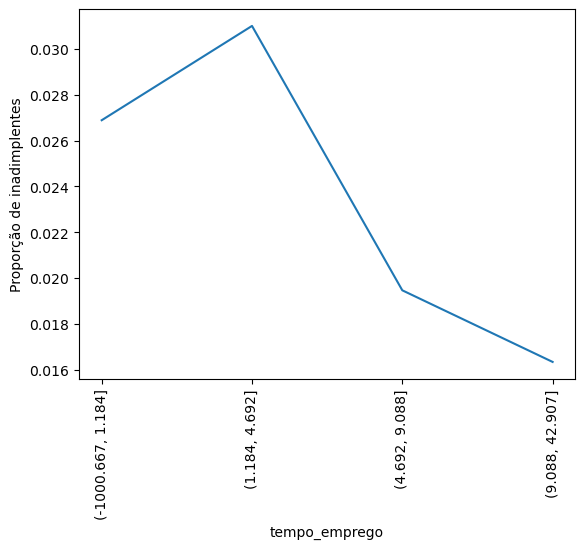

In [15]:
var = 'tempo_emprego'  # Agora estamos usando a coluna 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)  # Divide o tempo de emprego em 4 quantis
g = df.groupby(cat_srs)  # Agrupa os dados com base nos intervalos de tempo de emprego
biv = g['mau'].mean()  # Calcula a proporção de inadimplentes em cada intervalo de tempo de emprego

# Cria o gráfico de linha
ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")  # Define o rótulo do eixo Y

# Ajusta os rótulos do eixo X (intervalos de tempo de emprego) e rotaciona-os
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation=90)
plt.show()  # Exibe o gráfico



O Gráfico mostra que há uma tendência das pessoas com menos tempo de emprego se tronarem inadimplentes.

Tarefa 04 - Bivariada 
Para essa tarefa, crie três células extras, copie nelas o código das três células anteriores (na mesma ordem) e altere o parâmetro n_estimators= da função RandomForestClassifier e insira uma quantidade maior que 3 nesse parâmetro. Rode as três células anteriores para calcular a acurácia do modelo e veja se você consegue uma acurácia melhor.

In [18]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [19]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [20]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [21]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [23]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
16285,0,27.794521,0.293151,1,0,0,0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
16492,0,42.490411,3.257534,1,1,1,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
7456,1,38.057534,19.397260,1,1,1,0,3.0,False,True,...,False,False,False,False,False,False,True,False,False,False
4141,0,67.575342,-1000.665753,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
12411,1,37.728767,5.698630,1,0,0,0,3.0,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2,31.523288,6.386301,1,0,0,0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2537,0,52.457534,5.117808,1,0,1,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
9108,0,44.273973,13.293151,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1640,0,50.238356,5.060274,1,0,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=4)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=4)

In [25]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.43%


In [27]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1,0]/(tab.iloc[1,0] + tab.iloc[0,0]))
print(tab.iloc[1,1]/(tab.iloc[1,1] + tab.iloc[0,1]))
tab

0.008351756325227217
0.20652173913043478


mau,False,True
row_0,,
False,4037,73
True,34,19
